# Classifying Mushrooms: Edible vs Poisonous 

In [1]:
#import libraries 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [2]:
#import data (twice because needed un label encoded target column for prediction)

data = pd.read_csv('~/downloads/mushrooms.csv')
data1 = pd.read_csv('~/downloads/mushrooms.csv')

## Initial Exploration 

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
#look for null values

data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
#label encoding

labelencoder=LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])

In [6]:
#identify useful feature for prediction

data.corr()['class'].sort_values()

#gill color, bruises, ring-type, stalk-root high negative correlation
#gill_size high positive correlation 

gill-color                 -0.530566
bruises                    -0.501530
ring-type                  -0.411771
stalk-root                 -0.379361
gill-spacing               -0.348387
stalk-surface-above-ring   -0.334593
stalk-surface-below-ring   -0.298801
ring-number                -0.214366
stalk-color-above-ring     -0.154003
stalk-color-below-ring     -0.146730
stalk-shape                -0.102019
odor                       -0.093552
cap-color                  -0.031384
cap-shape                   0.052951
gill-attachment             0.129200
veil-color                  0.145142
spore-print-color           0.171961
cap-surface                 0.178446
habitat                     0.217179
population                  0.298686
gill-size                   0.540024
class                       1.000000
veil-type                        NaN
Name: class, dtype: float64

In [7]:
#average gives idea of proportion of values that are edible vss poisonous for that particular value

data[['class', 'gill-color']].groupby(['gill-color'], as_index=False).mean().sort_values(by='class', ascending=False)

,gill-color,class
0,0,1.000000
8,8,1.000000
3,3,0.721311
2,2,0.670213
7,7,0.428954
11,11,0.255814
10,10,0.204659
4,4,0.156863
5,5,0.106870
9,9,0.097561


In [8]:
data[['class', 'bruises']].groupby(['bruises'], as_index=False).mean().sort_values(by='class', ascending=False)

,bruises,class
0,0,0.693345
1,1,0.184834


In [9]:
data[['class', 'ring-type']].groupby(['ring-type'], as_index=False).mean().sort_values(by='class', ascending=False)

,ring-type,class
2,2,1.000000
3,3,1.000000
0,0,0.636888
4,4,0.205645
1,1,0.000000


In [10]:
data[['class', 'stalk-root']].groupby(['stalk-root'], as_index=False).mean().sort_values(by='class', ascending=False)

,stalk-root,class
0,0,0.709677
1,1,0.491525
3,3,0.228571
2,2,0.079137
4,4,0.000000


In [11]:
data[['class', 'gill-size']].groupby(['gill-size'], as_index=False).mean().sort_values(by='class', ascending=False)

,gill-size,class
1,1,0.885350
0,0,0.301497


## Visualise Edible vs Posionous for each value of each variable/feature

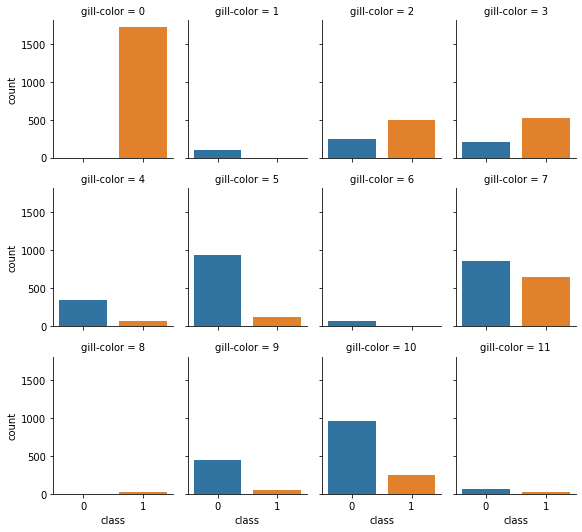

In [12]:
new_var=data[['class', 'gill-color']]
sns.catplot('class', col='gill-color', data=new_var, kind='count', height=2.5, aspect=.8, col_wrap=4);

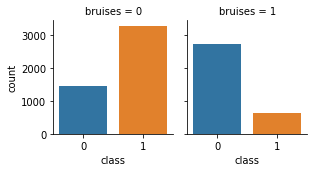

In [13]:
new_var=data[['class', 'bruises']]
sns.catplot('class', col='bruises', data=new_var, kind='count', height=2.5, aspect=.8, col_wrap=4);

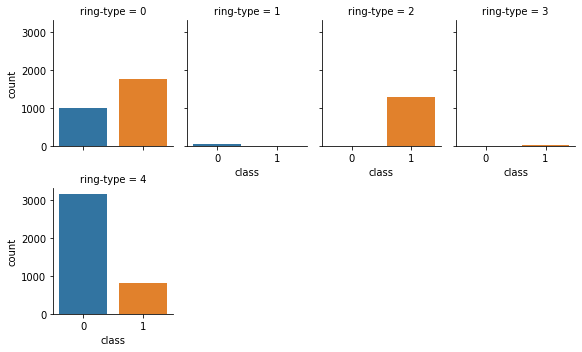

In [14]:
new_var=data[['class', 'ring-type']]
sns.catplot('class', col='ring-type', data=new_var, kind='count', height=2.5, aspect=.8, col_wrap=4);

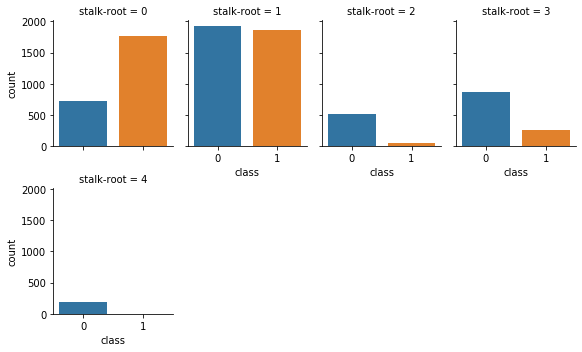

In [15]:
new_var=data[['class', 'stalk-root']]
sns.catplot('class', col='stalk-root', data=new_var, kind='count', height=2.5, aspect=.8, col_wrap=4);

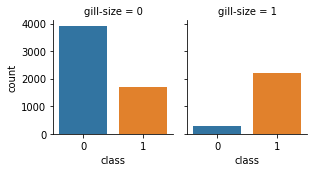

In [16]:
new_var=data[['class', 'gill-size']]
sns.catplot('class', col='gill-size', data=new_var, kind='count', height=2.5, aspect=.8, col_wrap=4);

## Classification models

### Decision Tree

In [17]:
X = data[['gill-color', 'gill-size', 'bruises', 'stalk-root', 'ring-type']]
Y = data1['class']  #note data1 this is because class has not been label encoded

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [19]:
clf = DecisionTreeClassifier(max_depth=10, min_samples_split=15)  #create instance of model class
clf = clf.fit(X_train, Y_train) #fit model to training data 
y_pred=clf.predict(X_test) #make predictions using fitted model and 
print("Decision Tree Classifier report \n", classification_report(Y_test, y_pred))  #visualise recall

Decision Tree Classifier report 
               precision    recall  f1-score   support

           e       0.95      1.00      0.98       845
           p       1.00      0.95      0.97       780

    accuracy                           0.97      1625
   macro avg       0.98      0.97      0.97      1625
weighted avg       0.98      0.97      0.97      1625



In [20]:
from sklearn.metrics import accuracy_score
print("Accuracy : ", str(accuracy_score(Y_test,y_pred)))

Accuracy :  0.9747692307692307


Remember: Precision is percentage of positives that were right. Of all the ones identified as postive, what percentage were right. True positives/all positives. 

Recall is number percentage of target that were found. Of all the positives, how many were identified. True Positives/ all mushrooms (false negatives + true positive)

For mushrooms, we want to minimise the recall for poisnous. We care less about false positives (for poisnous) than false negatives. 

### Classification with Logistic Regression

In [21]:
log = LogisticRegression()
log = log.fit(X_train, Y_train)
y_pred=log.predict(X_test)
print("Logistic Classifier report \n", classification_report(Y_test, y_pred))

Logistic Classifier report 
               precision    recall  f1-score   support

           e       0.77      0.85      0.81       845
           p       0.82      0.72      0.77       780

    accuracy                           0.79      1625
   macro avg       0.80      0.79      0.79      1625
weighted avg       0.79      0.79      0.79      1625



In [22]:
print("Accuracy : ", str(accuracy_score(Y_test,y_pred)))

Accuracy :  0.792


### One-hot encoding 

In [37]:
#one hot encoding (dummy encoding) instead of label encoding

encoded = pd.get_dummies(X, columns=X.columns)  #x being data with subset of most indicative attributes

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(encoded, data['class'], test_size=0.3)

In [33]:
clf = DecisionTreeClassifier(max_depth=10, min_samples_split=15)  #create instance of model class
clf = clf.fit(X_train, Y_train) #fit model to training data 
y_pred=clf.predict(X_test) #make predictions using fitted model and 
print("Decision Tree Classifier report \n", classification_report(Y_test, y_pred))  #visualise recall

Decision Tree Classifier report 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1231
           1       1.00      0.94      0.97      1207

    accuracy                           0.97      2438
   macro avg       0.97      0.97      0.97      2438
weighted avg       0.97      0.97      0.97      2438



In [34]:
print("Accuracy : ", str(accuracy_score(Y_test,y_pred)))

Accuracy :  0.9708777686628384


In [35]:
#classification using logisic regression with one hot encoding

log = LogisticRegression()
log = log.fit(X_train, Y_train)
y_pred=log.predict(X_test)
print("Logistic Classifier report \n", classification_report(Y_test, y_pred))

Logistic Classifier report 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      1231
           1       0.96      0.91      0.93      1207

    accuracy                           0.94      2438
   macro avg       0.94      0.94      0.94      2438
weighted avg       0.94      0.94      0.94      2438



In [36]:
print("Accuracy : ", str(accuracy_score(Y_test,y_pred)))

Accuracy :  0.9360131255127153


## Conclusion 

- One hot encoding led to substanitally better classification (both precision and recall) for logisitc regression. This suggests that having more features led to better modelling.
- Decision Tree classified had higher recall and precision regardless of the type of encoding 